# SI 370 FA 2017
## Class 5.1: Categorical data, crosstabs, and correlation

## October 2, 2017



# Overview of today 

- Announcements
  - Update to schedule: 
    - Visualiztion *after* midterm
      - Tableau head start
        - Download the latest version of Tableau Desktop [here](tableau.com/products/desktop/download-now)
        - Activate with your product key:  TDV9-C50A-6390-600B-8B91 
        - Already have a copy of Tableau Desktop installed? Update your license in the application: Help menu -> Manage Product Keys
- Comments/Questions/Concerns
- Last class: Univariate statistics
- Today: Categorical data, crosstabs (+ heatmaps), correlation
- Thursday: Regression, residuals and outliers
- Next week: Resampling, projects, review

# Objectives
In today's class we will explore:
- Categorical data
- Crosstabs
 - Heatmaps
- Correlation
 - SPLOM

First, load up everything we need.  Notice it's getting a bit more complex...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("paper")  # make figures fit
from pylab import rcParams
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 7, 4

# make the Pandas tables a little more readable

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Categorical Data

In [2]:
df = pd.DataFrame({"A":["a","b","c","a","a","a","b","c","b","c","b","c","b","c"],
                  "B":["x","i","j","x","i","i","j","j","j","y","j","j","x","i"]})
df.head()

A  B
0  a  x
1  b  i
2  c  j
3  a  x
4  a  i

In [3]:
counts = df['A'].value_counts()
percent = counts / sum(counts) * 100
summary = pd.DataFrame(dict(count = counts, 
                            prevalence = percent))
summary

count  prevalence
b      5   35.714286
c      5   35.714286
a      4   28.571429

In [4]:
summary = summary.reset_index()
summary

index  count  prevalence
0     b      5   35.714286
1     c      5   35.714286
2     a      4   28.571429

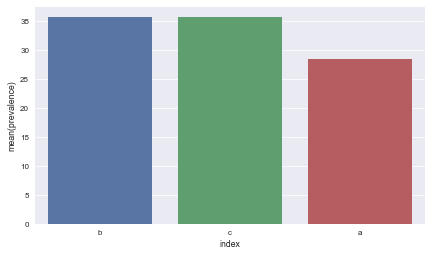

In [5]:
sns.barplot(x="index", y="prevalence", data=summary);

# <font color="red">BEGIN Q1: Generate some data (Part I)
Working in groups of about 10-12 people, collect and share data about each person's hair and eye color.  

You might want to have one person act as scribe and then share the data with all group members.  Once you have the data, load it into a pd.DataFrame called ```colors```.  

How you do this depends on how you shared the data.  If you shared via a CSV file, you can use 

```
colors = pd.DataFrame.from_csv('hairandeye.csv', index_col=None)
```

If you want to enter the data manually, you can do something like:

```
colors = pd.DataFrame({'hair':['black','brown','brown','black','red'],
                        'eye':['brown','brown','brown','hazel','hazel]})
```

In [10]:
# replace the next lines with your data
colors = pd.DataFrame({'hair':['black','brown','brown','blonde','red','black','black'],
                        'eye':['brown','green','brown','blue','hazel','brown','brown']})

In [11]:
colors

eye    hair
0  brown   black
1  green   brown
2  brown   brown
3   blue  blonde
4  hazel     red
5  brown   black
6  brown   black

# <font color="red">END Q1</font>


Now let's generate some summary data, counting the percent that each hair color has.  We'll call that prevalence and plot it in a simple bar chart.

# <font color="red">BEGIN Q2</font>

## <font color="red">Q2a: Create a summary of the prevalence of each hair color

In [12]:
counts = colors['hair'].value_counts()
percent = counts / sum(counts) * 100
colorSummary = pd.DataFrame(dict(count = counts, 
                            prevalence = percent))
colorSummary

count  prevalence
black       3   42.857143
brown       2   28.571429
blonde      1   14.285714
red         1   14.285714

In [13]:
# now pop out the index column so we can use it to plot
colorSummary = colorSummary.reset_index()
colorSummary

index  count  prevalence
0   black      3   42.857143
1   brown      2   28.571429
2  blonde      1   14.285714
3     red      1   14.285714

## <font color="red">Q2b: And now create a barplot of hair color</font>

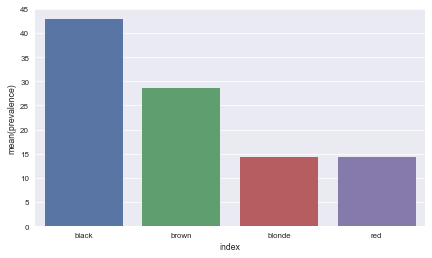

In [15]:
sns.barplot(x="index", y="prevalence", data=colorSummary);

# <font color="red">END Q2</font>

# Since we're on the subject...

Let's say we have another data set of vehicle colors, makes, and classes:

In [16]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [19]:
df.head()

color    make vehicleClass
0    red    ford          suv
1  green  toyota          suv
2  green   dodge          suv
3  black    ford          car
4    red  toyota          car

In [22]:
ct = pd.crosstab(df.color,df.vehicleClass)
ct

vehicleClass  car  suv  truck
color                        
black           2    2      2
green           4    6      2
red             2    4      0

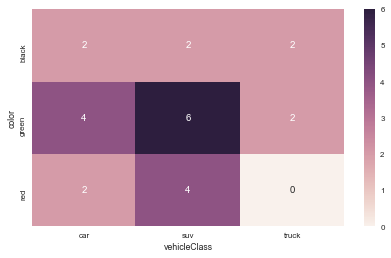

In [23]:
sns.heatmap(ct,annot=True)

# <font color="red">BEGIN Q3: Crosstabs on your data</font>
Let's create a crosstab of your hair and eye color data

In [26]:
colorsCrosstab = pd.crosstab(colors.eye, colors.hair) # replace ... with hair and eye colors
colorsCrosstab

hair   black  blonde  brown  red
eye                             
blue       0       1      0    0
brown      3       0      1    0
green      0       0      1    0
hazel      0       0      0    1

Now create a heatmap of the colorsCrosstab

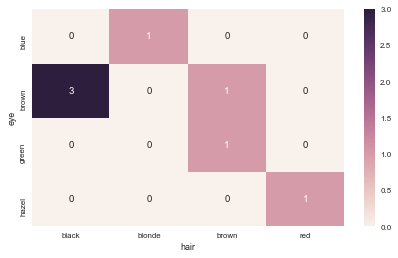

In [27]:
sns.heatmap(colorsCrosstab, annot=True) # replace the '...' with the appropriate arguments

# <font color="red">END Q3</font>

# On to bivariate data

## Correlation

* How related are two variables?

## Regression

* If they're correlated, can I have a fitted model?

## Prediction

* If I have a fitted model, can I predict arbitrary values?

## [Dunbar's Number](https://en.wikipedia.org/wiki/Dunbar's_number)

In [28]:
dunbar = pd.read_csv('sim_dunbar.csv')
dunbar.head()

fossil  estimated_age  cranial_capacity  brain_volume  neocortex_ratio  \
0    AL333-45           3.10            557171        509171            71.13   
1    AL162-28           3.10            426155        404869            63.42   
2  AL333-105J           3.13            362751        327299            61.42   
3       Sts-5           2.79            537730        414238            66.72   
4   Sts-19/58           2.77            414366        435984            64.00   

   group_size  grooming_time  
0       69.13          21.36  
1       57.42          16.57  
2       60.42          15.57  
3       69.72          19.95  
4       65.00          17.60

Let's create a scatterplot of two of those variables...

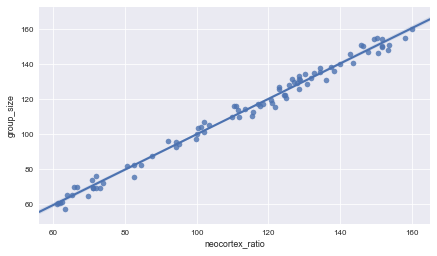

In [31]:
sns.regplot(data=dunbar,x='neocortex_ratio',y='group_size',fit_reg=True)

# A note about correlation

## Correlation != Causation

Sometimes:
* Changes in X cause changes in Y
  * Run faster, heart beats faster
* Changes in Y cause changes in X (order matters)
* Changes in Z causes changes in X and Y, but Y also changes because of X
  * More sleep (Z) causes you to be happier (X) and healthier (Y)
* Changes in Y and X are caused by change in Z (hidden)

## Things co-vary because of something uninteresting (spurious correlation)
![](http://www.fico.com/en/blogs/wp-content/uploads/2015/05/Pirates-chart.png 'pirates')

## Correlation
* How related are two variables?

* One version: *Pearson*


## Correlation
* Range from -1 to 1
 * -1 is strong negative-correlation 
   * One goes up, the other goes down
 * 1 is strong positive-correlation
   * One goes up, the other goes up
 * 0 Is no correlation
 * Everything in between is up for interpretation

* And don’t forget correlation != causation



## Putting distribution and correlation together in one chart

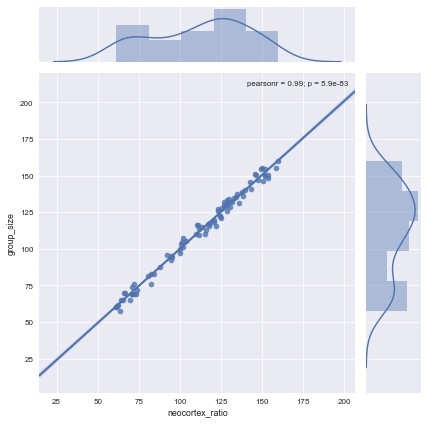

In [32]:
g = sns.JointGrid(x='neocortex_ratio',y='group_size', data=dunbar)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)


# <font color="red">BEGIN Q4: Correlation</font>

## But first, more data!

We're going to collect some data in class, and you'll need to work together to create a whole-class dataset.  We'll fill in the details in class, but when you're done, you should have a pd.DataFrame that consists of the following three columns: dom, nondom, and letters.  Let's call the pd.DataFrame ``writing``.

In [41]:
# A simple timer
from time import sleep # Were that is was so simple

for seconds in range(21):
    print(seconds, end=" ")
    sleep(1)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [42]:
# Replace the data on the next line with the ones generated in class
writing = pd.DataFrame({'dom':[4,7,6,3,1,3,6,7],'nondom':[7,9,14,2,10,15,18,22],'letters':[10,15,23,16,29,31,33,33]})


# <font color="red">END Q4</font>

Take a peek at the DataFrame

In [38]:
writing.head()

dom  letters  nondom
0    4       10       7
1    7       15       9
2    6       23      14
3    3       16       2
4    1       29      10

# <font color="red">Q5: Plotting regressions</font>

## <font color="red">Q5a: JointGrid it!</font>

Let's use a JointGrid to look at a two variables: dom and nondom, along with their distributions

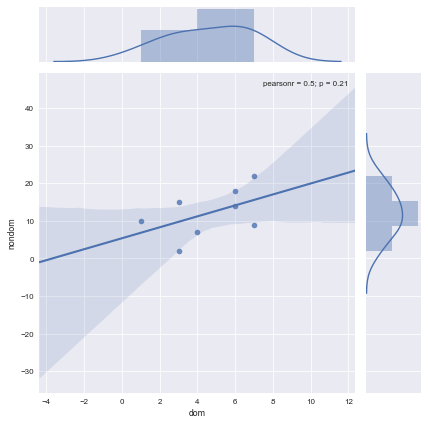

In [39]:
g = sns.JointGrid(x='dom',y='nondom', data=writing) # fill in the column names for a pair of column names
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

## <font color="red">Q5b: PairPlot it!</font>

And now create a pairplot to visualize the relationships between the three columns

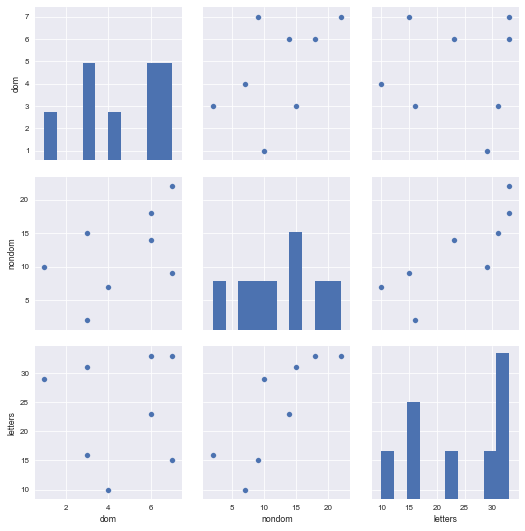

In [40]:
sns.pairplot(writing[['dom','nondom','letters']])

## <font color="red">Q5c: Just the facts, please.</font>

And finally, calculate correlation coefficients for each pair of columns

In [43]:
writing.corr()

dom   letters    nondom
dom      1.000000  0.023236  0.500865
letters  0.023236  1.000000  0.811373
nondom   0.500865  0.811373  1.000000

## <font color="red">Q5d: Summarize what information about your data you get from Q5a, Q5b, and Q5C.

<font color="red">REPLACE THIS WITH YOUR ANSWER</font>

# <font color="red">END Q5</font>

## Assumptions for correlation
* Many tests assume normally distributed data
  * That bell shape curved
* Tests can look at the data (the actual value)
  * Is there a direct mapping between cortex size and group size
    * If your brain is 5cm do you have 100 friends?
    * If your brain is 10cm do you have 200 friends?
  * Sometimes called parametric tests


## Pearson Assumptions
* Two linear variables
* Assumptions
 * Normally distributed data (both)
 * Linearity (straight line)
 * Homoscedasticity

* What counts?
 * .8 – large
 * .5 – moderate
 * .2 – small


## Non-Parametric

* When your data is not normally distributed
  * Relationships are wonky
* Instead, use ranks:
  * Does the monkey with the 6th largest brain have the 6th most friends?
  * Does the monkey with the 12th largest brain have the 12th most friends?


## Rank versions

Kendall's $\tau$

Spearman's $\rho$


Let's load up our survey data and shorten the column names,

In [44]:
s = pd.read_csv('370survey.csv')
s.columns=['f','l','g','h','e','w','q1','q2','q3','q4','q5','total']

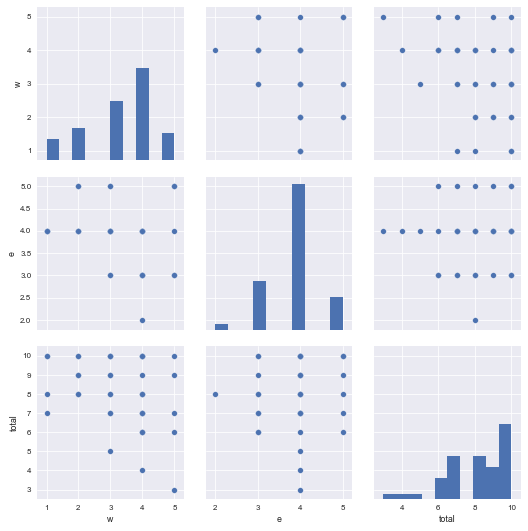

In [45]:
# Next, create a pairplot of three of the columns (worry, enthusiasm, and total score)
sns.pairplot(s[['w','e','total']])

# <font color="red">BEGIN Q6: Do the individual variables look normally distributed to you?  What about the scatterplots?  What do those tell you?  </font>



<font color="red">W looks somewhat normal, E not really, and total definitely not.</font>

# <font color="red">END Q6</font>

In [46]:
tau, p_value = stats.kendalltau(s['e'], s['w'])
print("Kendall's tau:",tau,p_value)
correlation,pvalue = stats.spearmanr(s['e'],s['w'])
print("Spearman's rho:",correlation,pvalue)

Kendall's tau: -0.229410018259 0.0873422570071
Spearman's rho: -0.26044316401 0.0916487155512


The take-home message: Kendall's tau and Spearman's rho give pretty similar results to each other, and are somewhat more "conservative" than Pearson's r (i.e. it's harder to get statistically significant relationships).

# Summary
* Categorical variables
 * Uni/Multivariate (crosstab)
* Bivariate
 * Visualizing relationships
 * Correlations

## Next time: Regression, residuals and outliers

## <font color="red">REMEMBER TO SUBMIT your Jupyter Notebook (to Lab 5.1) via Canvas before you leave class today!